In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from sklearn.metrics import *
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn.preprocessing import *
%matplotlib inline

In [53]:
df = pd.read_csv('../data/data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [55]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [56]:
X = df.drop('target', axis=1)
y = df['target']

In [57]:
def graph(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{model.__class__.__name__} \nAccuracy\t: {accuracy_score(y_test, y_pred)} \nPrecision\t: {precision_score(y_test, y_pred)} \nRecall\t\t: {recall_score(y_test, y_pred)} \nF1\t\t: {f1_score(y_test, y_pred)} \nROC AUC\t\t: {roc_auc_score(y_test, y_pred)}')
    print(f'Confusion Matrix')
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, cmap = 'YlGnBu_r')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()

In [58]:
train, test = train_test_split(df, test_size=0.4, random_state=28)
train, validation = train_test_split(df, test_size=0.1, random_state=28)

print(f"Train set has {train.shape[0]} rows and {train.shape[1]} columns")
print(f"Test set has {test.shape[0]} rows and {test.shape[1]} columns")
print(f"Validation set has {validation.shape[0]} rows and {validation.shape[1]} columns")
test.head()

Train set has 272 rows and 14 columns
Test set has 122 rows and 14 columns
Validation set has 31 rows and 14 columns


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3,1
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0


In [59]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [60]:
le = LabelEncoder()

for col in cat_cols:
    train[col] = le.fit_transform(train[col])
    validation[col] = le.transform(validation[col])
    test[col] = le.transform(test[col])

X_train = train.drop('target', axis=1)
y_train = train['target']

X_test = test.drop('target', axis=1)
y_test = test['target']

X_validation = validation.drop('target', axis=1)
y_validation = validation['target']

# scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_validation = scaler.transform(X_validation)

DecisionTreeClassifier 
Accuracy	: 0.9262295081967213 
Precision	: 0.9242424242424242 
Recall		: 0.9384615384615385 
F1		: 0.9312977099236641 
ROC AUC		: 0.9253711201079622
Confusion Matrix


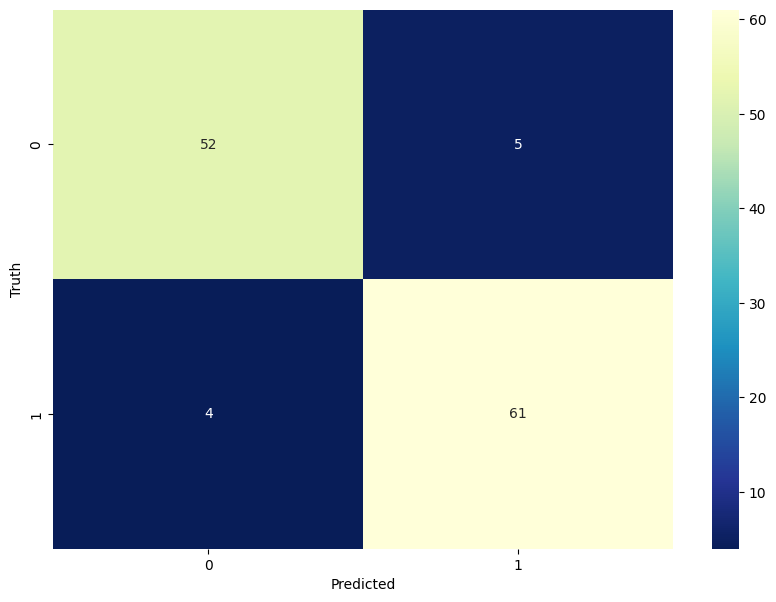

In [64]:
model = DecisionTreeClassifier()
graph(model, X_train, X_test, y_train, y_test) 